In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.model_selection import train_test_split

In [4]:
def construct_matrix(x, y):
    return np.hstack([x.reshape((x.shape[0], 1)), y.reshape(y.shape[0], 1)])

In [5]:
x = np.array([1, 3, 5, 7])
y = np.array([2, 4, 6, 8])

In [6]:
construct_matrix(x, y)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [7]:
construct_matrix(np.array([1,2]),np.array([3,4]))

array([[1, 3],
       [2, 4]])

**2.** Реализуйте функцию, принимающую на вход массив целых неотрицательных чисел `nums` и возвращающую самый частый элемент массива.

In [8]:
def most_frequent(nums):
    """
    Find the most frequent value in an array
    :param nums: array of ints
    :return: the most frequent value
    """
    uniques = np.unique(np.array(nums), return_counts=True)
    return uniques[0][np.argmax(uniques[1])]

In [9]:
nums = [1, 2, 4, 6, 2, 1, 1, 3, 5, 2, 8, 5, 6, 6]

In [10]:
most_frequent(nums)

1

In [18]:
base = "C:\\Users\\anaki\\Desktop\\Studies\\MastersNShi\\Yandex\\hw1\\"
tables = base + "data\\"

In [19]:
data = pd.read_csv(tables + 'organisations.csv')
features = pd.read_csv(tables + 'features.csv')
rubrics = pd.read_csv(tables + 'rubrics.csv')

In [20]:
data[:]

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
...,...,...,...,...,...,...
68334,4379286080707082909,msk,NaN,3.812500,30774,1018 1415 10462 11629 11867 20422 20424 118949...
68335,7916477189329738565,msk,NaN,4.894231,30776,11634 11629 3501481353 11177 3501773763 11867 ...
68336,12358902585434046825,msk,NaN,4.156250,30774,20422 11867 246 3501754799 3501779478 12048 35...
68337,1712093598996183140,spb,NaN,NaN,30771 30774,3491142672 3501481353 11867 20422 273469383 11...


In [21]:
rubrics_dict = dict(zip(rubrics["rubric_id"], rubrics["rubric_name"]))
rubrics_dict

{30519: 'Булочная, пекарня',
 30770: 'Бар, паб',
 30771: 'Быстрое питание',
 30774: 'Кафе',
 30775: 'Пиццерия',
 30776: 'Ресторан',
 30777: 'Столовая',
 31286: 'Спортбар',
 31350: 'Кондитерская',
 31375: 'Суши-бар',
 31401: 'Кальян-бар',
 31495: 'Кофейня',
 3108292683: 'Бар безалкогольных напитков',
 3501514558: 'Фудкорт',
 3501750896: 'Кофе с собой'}

In [22]:
features_dict = dict(zip(features['feature_id'], features['feature_name']))
features_dict

{1: 'prepress_and_post_printing_processing',
 40: 'products',
 54: 'printing_method',
 77: 'fuel',
 79: 'shop',
 82: 'last_minute_deals_only',
 104: 'tour_type',
 110: 'audio_guide',
 111: 'cargo_transportation',
 113: 'manufacturing',
 114: 'installation',
 115: 'repairs',
 116: 'production',
 117: 'sale',
 133: 'music_genre',
 135: 'electroniccigarette',
 137: 'variety_food',
 140: 'room_disabled',
 175: 'arts',
 246: 'karaoke',
 249: 'street_theatre',
 253: 'performance',
 256: 'vip_zone',
 270: 'money_transfers',
 275: 'loans_private_individuals',
 282: 'sober_driver',
 288: 'accepted_credit_cards',
 305: 'refrigerator',
 308: 'minibar',
 312: 'room_number',
 328: 'speciality',
 337: 'type_of_rooms',
 344: 'building_repair',
 349: 'hospital_profile',
 354: 'type_parking',
 372: 'services_corporate_clients',
 379: 'currency_exchange',
 392: 'debit_cards',
 402: 'improving_driver_qualifications',
 405: 'female_instructor',
 409: 'medical_board',
 425: 'training_machines',
 427: 'targ

In [23]:
print(data.isna().value_counts(subset=['average_bill'])[True], data.isna().value_counts(subset=['average_bill'])[False])
# data.dropna(subset=['average_bill'])

35561 32778


In [24]:
data.dropna(subset=['average_bill'], inplace = True)
data.value_counts(subset=['average_bill'])

average_bill
500.0           22329
1000.0           5482
1500.0           2696
2000.0           1184
2500.0            445
                ...  
40000.0             1
17500.0             1
16500.0             1
45500.0             1
7502000.0           1
Name: count, Length: 63, dtype: int64

In [ ]:
data = data[data.average_bill <= 2500]

In [55]:
data.value_counts(subset=['average_bill']).index[0]

(500.0,)

In [133]:
data.shape[0]

32136

In [26]:
data[['rubrics_id', 'features_id']] = data[['rubrics_id', 'features_id']].map(lambda x: x.split(' '))

In [27]:
data

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,"[30776, 30774]","[3501685156, 3501779478, 20422, 3502045016, 35..."
1,16076540698036998306,msk,500.0,4.375000,[30771],"[1509, 1082283206, 273469383, 10462, 11617, 35..."
2,8129364761615040323,msk,500.0,4.000000,[31495],"[10462, 11177, 11617, 11629, 1416, 1018, 11704..."
3,15262729117594253452,msk,500.0,4.538813,"[30776, 30770]","[3501618484, 2020795524, 11629, 11617, 1018, 1..."
4,13418544315327784420,msk,500.0,4.409091,[31495],"[11617, 10462, 11177, 1416, 11867, 3501744275,..."
...,...,...,...,...,...,...
68328,17662684569129497551,spb,1000.0,4.561707,[30776],"[246, 3501779478, 1018, 3501618484, 3501481353..."
68329,5700899951016592061,msk,1500.0,4.377129,[31401],"[3501773763, 10462, 1018, 246, 3501779478, 350..."
68330,4686040819909966338,msk,1500.0,3.666667,[30776],"[10462, 1189498238, 11629, 1416, 1415, 11741, ..."
68331,12499715465202129892,msk,1500.0,4.554577,"[30770, 30776, 30774]","[273469383, 10462, 21247, 1509, 1416, 35016184..."


In [120]:
np.round(data[(data.city == 'msk') & ('30774' in data.rubrics_id)]['average_bill'].mean() - data[(data.city == 'spb') & ('30774' in data.rubrics_id)]['average_bill'].mean())

nan

In [147]:
data[(data.city == 'msk')].value_counts(subset=['average_bill'])

average_bill
500.0           13761
1000.0           3716
1500.0           2088
2000.0            962
2500.0            365
Name: count, dtype: int64

In [146]:
data[(data.city == 'spb')].value_counts(subset=['average_bill'])

average_bill
500.0           8568
1000.0          1766
1500.0           608
2000.0           222
2500.0            80
Name: count, dtype: int64

In [28]:
mask_cafe = data['rubrics_id'].map(lambda x: '30774' in x)

np.round(data[mask_cafe & (data.city == 'msk')]['average_bill'].mean() - data[mask_cafe & (data.city == 'spb')]['average_bill'].mean())

142.0

In [29]:
bilrating = data.dropna(subset='rating')[['average_bill', 'rating']]
print(bilrating[bilrating.average_bill == 500]['rating'].median(), 
        bilrating[bilrating.average_bill == 1000]['rating'].median(),
        bilrating[bilrating.average_bill == 1500]['rating'].median(),
        bilrating[bilrating.average_bill == 2000]['rating'].median(),
        bilrating[bilrating.average_bill == 2500]['rating'].median())

4.2 4.304347826086956 4.325581395348837 4.378125217028961 4.415954415954416


(array([  3.,   0.,   1.,   2.,   0.,   7.,  16.,  57., 200.,  75.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

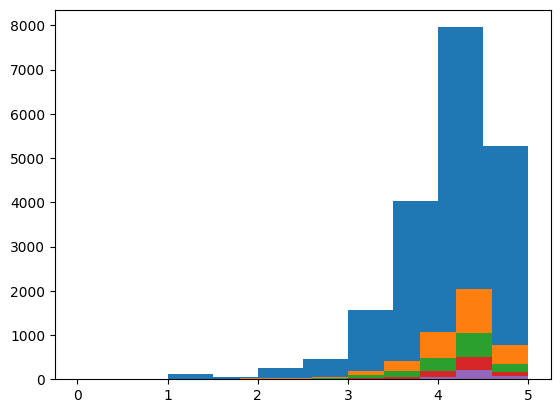

In [30]:
ax = [plt.figure().add_subplot()] * 5

bilrating = data.dropna(subset='rating')[['average_bill', 'rating']]
ax[0].hist(bilrating[bilrating.average_bill == 500]['rating'])
ax[1].hist(bilrating[bilrating.average_bill == 1000]['rating'])
ax[2].hist(bilrating[bilrating.average_bill == 1500]['rating'])
ax[3].hist(bilrating[bilrating.average_bill == 2000]['rating'])
ax[4].hist(bilrating[bilrating.average_bill == 2500]['rating'])

In [31]:
mask_pub = data['rubrics_id'].map(lambda x: '30770' in x)

np.round(data[mask_pub]['average_bill'].mean() - data[mask_cafe]['average_bill'].mean())

82.0

In [34]:
clean_data_train, clean_data_test = train_test_split(
    data, stratify=data['average_bill'], test_size=0.33, random_state=42)

In [72]:
clean_data_test.shape[0]

10605

In [76]:
from scipy.stats import mode

from sklearn.base import RegressorMixin

class MeanRegressor(RegressorMixin):
    # Predicts the mean of y_train
    def fit(self, X=None, y=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        self.mean = y.mean()
        pass

    def predict(self, X=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        return self.mean*np.ones((X.shape[0], 1))

from sklearn.base import ClassifierMixin

class MostFrequentClassifier(ClassifierMixin):
    # Predicts the rounded (just in case) median of y_train
    def fit(self, X=None, y=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        self.mostFrequent = data.value_counts(subset=['average_bill']).index[0]
        pass

    def predict(self, X=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        return self.mostFrequent

In [77]:
reg = MeanRegressor()
reg.fit(y=clean_data_train['average_bill'])

clf = MostFrequentClassifier()
clf.fit(y=clean_data_train['average_bill'])

In [79]:
np.sqrt(sklearn.metrics.mean_squared_error(clean_data_test['average_bill'], reg.predict(clean_data_test)))

448.7143889551622